In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
dry = pd.read_csv('data\\Dry.csv')
dry.head()

,X,Y,streamorde,IX,Shape_Leng,X_UTM,Y_UTM,flowacc_co,slp_deg_co,AngeloSage
0,457888.0,4379397.0,4384,21564,4384.0,457888.0,4379397.0,656490,4.17938,741.708
1,457889.0,4379397.0,4384,21564,4384.0,457889.0,4379397.0,656494,5.32382,741.622
2,457890.0,4379397.0,4384,21564,4384.0,457890.0,4379397.0,656499,4.39489,741.633
3,457891.0,4379398.0,4384,21564,4384.0,457891.0,4379398.0,656509,10.85030,741.695
4,457892.0,4379399.0,4384,21564,4384.0,457892.0,4379399.0,656576,8.50299,741.586


In [46]:
segments = set(dry['IX'])
len(segments)

756

In [47]:
dry = dry.sample(frac=0.2)
dry = dry.sort_values(['IX', 'AngeloSage'])

In [48]:
def dist(x1, y1, x2, y2):
    distance = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [49]:
slopes = []
areas = []

In [50]:
contourThreshold = 30

for segment in segments:
    df = dry[dry['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0

        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 

                if dif > contourThreshold:
#                     print 'dif > 2'
#                     print 'elev i: ' +str(df.iloc[i]['AngeloSage'])
#                     print 'elev j+1: ' +str(df.iloc[j+1]['AngeloSage'])
#                     print 'elev dif = ' + str(dif)
#                     print 'distance = ' + str(distance)
#                     print 'dif greater than 2, j = ' + str(j)
#                     print '--------------breaking'
                    areas.append(df.iloc[i]['flowacc_co'])
                    slopes.append((dif/distance)*100)
                    break


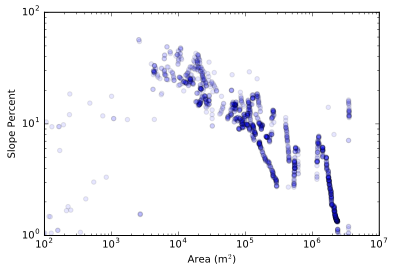

In [51]:
plt.scatter(areas,slopes, alpha=0.1)
plt.xlabel(r'Area (m$^2$)')
plt.ylabel('Slope Percent')
plt.xlim([100,10**7])
plt.ylim([1,100])
plt.xscale('log')
plt.yscale('log')

In [52]:
len(slopes)

1802